# Lab 5 - Classification :  k-NN and Naive Bayes (using sklearn libraries)

## k-NN

Use **"Pima Indians Diabetes Dataset from UCI Machine Learning Repository"** for this question.It is a binary class dataset. Split the dataset into train(80%), validation(10%) and test sets(10%).

Run k-Nearest neighbours for different k values. Choose your own subset of k (atleast 10) and choose the best value of k from this subset. In solving real-world problems, the values of k are chosen based on experience and hence it is a tunable hyperparameter. Select the k, using validation set, which returns the best accuracy score. Report accuracy score by performing k-NN on the test dataset using the chosen k value. 

In [1]:
# Code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv("datasets_228_482_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = np.array(df["Outcome"])
feature_columns = [col for col in df.columns if col != "Outcome"]
X = np.array(df[feature_columns])
X = (X - np.mean(X, axis=0))/np.std(X, axis=0) # Normalization

# Splitting Data into Training, Validation and Test sets
X_train, X_val, X_test = np.split(X, [int(.8 * len(X)), int(.9 * len(X))])
y_train, y_val, y_test = np.split(y, [int(.8 * len(y)), int(.9 * len(y))])

In [4]:
k_values = list(range(1, 45, 2))
validation_accuracies = []
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_val_pred = neigh.predict(X_val)
    validation_accuracies.append(accuracy_score(y_val, y_val_pred) * 100)

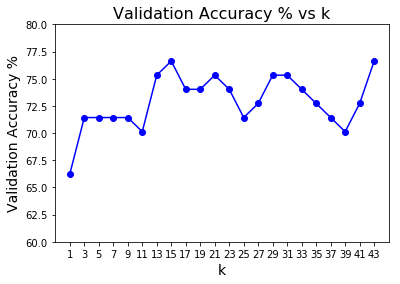

Validation Accuracy % for each value of K:


,K,Validation Accuracy %
0,1,66.233766
1,3,71.428571
2,5,71.428571
3,7,71.428571
4,9,71.428571
5,11,70.129870
6,13,75.324675
7,15,76.623377
8,17,74.025974
9,19,74.025974


In [5]:
plt.plot(k_values, validation_accuracies, 'bo-')
plt.xticks(k_values)
plt.title("Validation Accuracy % vs k", size=16)
plt.xlabel("k", size=14)
plt.ylim([60, 80])
plt.ylabel("Validation Accuracy %", size=14)
plt.show()

print("Validation Accuracy % for each value of K:")
val_acc_dict = {"K": k_values, "Validation Accuracy %": validation_accuracies}
df_val_acc = pd.DataFrame(val_acc_dict)
df_val_acc

In [6]:
bestk = k_values[validation_accuracies.index(max(validation_accuracies))]
print("Value of K to get highest validation accuracy % =", bestk)
print("Best Validation Accuracy = {}%".format(max(validation_accuracies)))

Value of K to get highest validation accuracy % = 15
Best Validation Accuracy = 76.62337662337663%


In [7]:
# Using the best value of k
neigh = KNeighborsClassifier(n_neighbors=bestk)
neigh.fit(X_train, y_train)
y_test_pred = neigh.predict(X_test)
acc = accuracy_score(y_test, y_test_pred)
print("Test accuracy = {}%".format(acc*100))

Test accuracy = 76.62337662337663%


#### Results

1. The best value of "k" for k Nearest Neighbours is = 15
2. The test accuracy achieved = 76.62337662337663%

## Naive Bayes

Use **"Optical recognition of handwritten digits dataset"** for this question. ** Download dataset from sklearn**. The dataset has 10 classes and 64 attributes (8x8 images). Visualise images from the dataset. Perform a train test split in the ratio 4:1. 

Naive Bayes - perform multiclass classification to classify the dataset into one of the ten classes. Experiment with the priors (Gaussian and Bernoulli) and report the best prior. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too).



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import seaborn as sns

In [9]:
X, y = load_digits(return_X_y=True) # Loading the data

#### Visualization

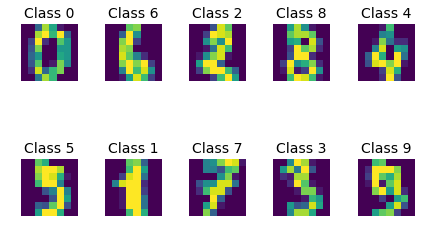

In [10]:
plot_indices = []
search_val = 0
for i, label in enumerate(y):
    if label==search_val:
        plot_indices.append(i)
        search_val += 1
    if search_val==10:
        break
        
fig, a = plt.subplots(2, 5)
for i in range(len(plot_indices)):
    a[i%2][i%5].imshow(X[plot_indices[i]].reshape(8, 8))
    a[i%2][i%5].axis("off")
    a[i%2][i%5].set_title("Class {}".format(plot_indices[i]), size=14)
    
plt.tight_layout()
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### Gaussian Naive Bayes

In [12]:
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train, y_train)
y_train_pred = gaussian_clf.predict(X_train)
y_test_pred = gaussian_clf.predict(X_test)

# Evaluate performance (accuracy and F1 score)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Training Accuracy = {} %".format(train_acc*100))
print("Test Accuracy = {} %".format(test_acc*100))
print()
print("Training F1 Score = {}".format(train_f1))
print("Test F1 Score = {}".format(test_f1))

Training Accuracy = 85.59498956158664 %
Test Accuracy = 84.72222222222221 %

Training F1 Score = 0.8580319196473957
Test F1 Score = 0.8489770318561581


#### Confusion Matrix

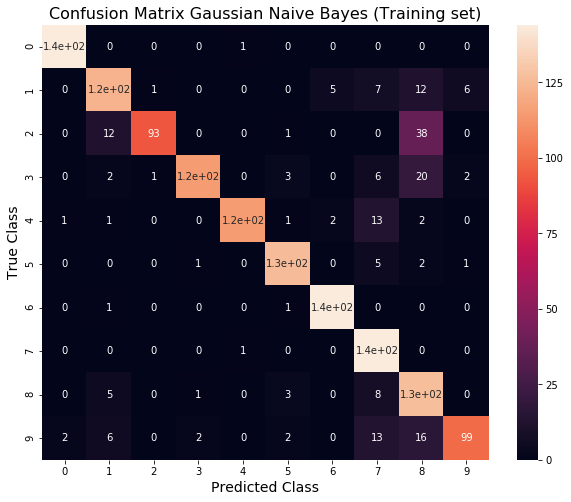

In [13]:
gaussian_cnf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(gaussian_cnf_matrix_train, annot=gaussian_cnf_matrix_train)
ax.set_title("Confusion Matrix Gaussian Naive Bayes (Training set)", size=16)
ax.set_xlabel("Predicted Class", size=14)
ax.set_ylabel("True Class", size=14)
plt.show()

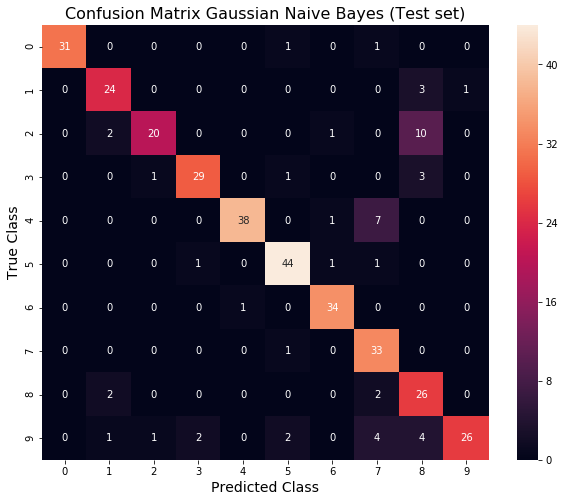

In [14]:
gaussian_cnf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(gaussian_cnf_matrix_test, annot=gaussian_cnf_matrix_test)
ax.set_title("Confusion Matrix Gaussian Naive Bayes (Test set)", size=16)
ax.set_xlabel("Predicted Class", size=14)
ax.set_ylabel("True Class", size=14)
plt.show()

### Bernoulli Naive Bayes

In [15]:
bern_clf = BernoulliNB()
bern_clf.fit(X_train, y_train)
y_train_pred = bern_clf.predict(X_train)
y_test_pred = bern_clf.predict(X_test)

# Evaluate performance (accuracy and F1 score)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Training Accuracy = {} %".format(train_acc*100))
print("Test Accuracy = {} %".format(test_acc*100))
print()
print("Training F1 Score = {}".format(train_f1))
print("Test F1 Score = {}".format(test_f1))

Training Accuracy = 86.0125260960334 %
Test Accuracy = 86.38888888888889 %

Training F1 Score = 0.8591724703280084
Test F1 Score = 0.8624817234502353


#### Confusion Matrix

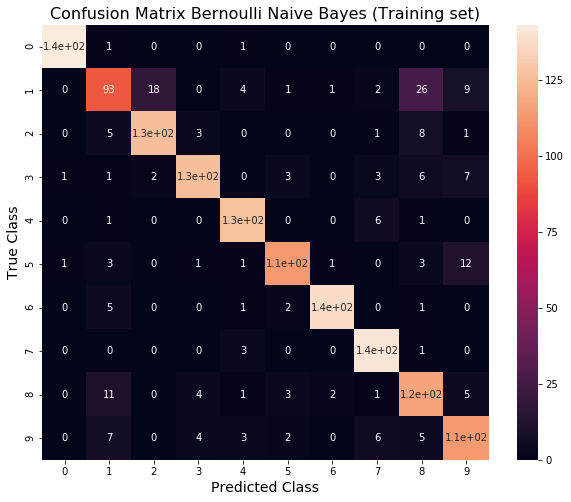

In [16]:
bern_cnf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(bern_cnf_matrix_train, annot=bern_cnf_matrix_train)
ax.set_title("Confusion Matrix Bernoulli Naive Bayes (Training set)", size=16)
ax.set_xlabel("Predicted Class", size=14)
ax.set_ylabel("True Class", size=14)
plt.show()

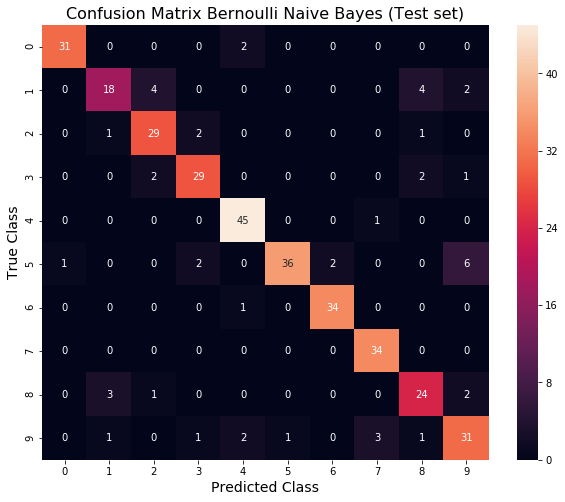

In [17]:
bern_cnf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(bern_cnf_matrix_test, annot=bern_cnf_matrix_test)
ax.set_title("Confusion Matrix Bernoulli Naive Bayes (Test set)", size=16)
ax.set_xlabel("Predicted Class", size=14)
ax.set_ylabel("True Class", size=14)
plt.show()

### Results

**Gaussian Naive Bayes**

1. Training Accuracy = 85.59498956158664 %
2. Test Accuracy = 84.72222222222221 %
3. Training F1 Score = 0.8580319196473957
4. Test F1 Score = 0.8489770318561581

**Bernoulli Naive Bayes**
1. Training Accuracy = 86.0125260960334 %
2. Test Accuracy = 86.38888888888889 %
3. Training F1 Score = 0.8591724703280084
4. Test F1 Score = 0.8624817234502353

Based on the value of F1 score on the tests dataset, we observe that for this dataset, the **better prior is a Bernoulli distribution**. It gives higher training accuracy, test accuracy and F1 score. 

It shows that the distribution of the dataset of digits is better seen as a discrete distribution that a continuous distribution.